**References**: https://github.com/blockchain-etl/ethereum-etl

# Problem Set 1 Checklist

**Please customize the following inputs to generate your own results for discussion**

 
* Infura/Alchemy/QuickNode API endpoints: experiment with multiple node operators and see if you could get the same data

* Data radius, start, and end blocks: pick a smaller radius for testing before you scale

* Token address: Pick your choice of token in querying the token transfer part

**Please post the sharing (Allow viewing or commenting only) URL for your Google Colab after you are done below.**

Important: Change your private API token key to "API_KEY" before posting 



## Question 1 
Did you get the same data querying via different node operators? Please point to at least one specific observation to validate your answer. 

Please insert Figures/Tables to better represent your idea. 


yes, I got the same data querying with the different nodes. Below are screenshots of the first 4 observations for each node. I checked the first 3 columns for each node to see if they match: for example, the first observation for each node is numbered "1687332", has a hash beginning in "0x829.." and parent_hash beginning with "0x1848..".

Infura:
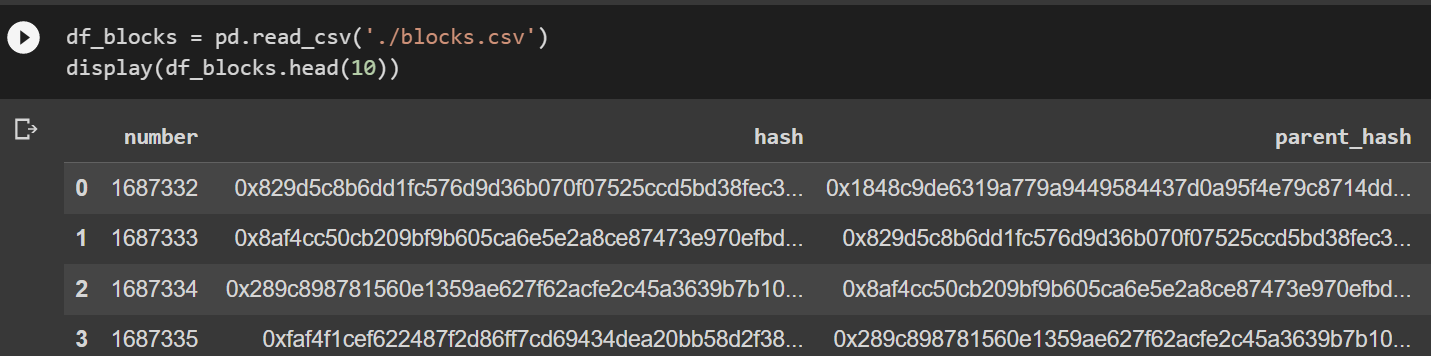

Alchemy:
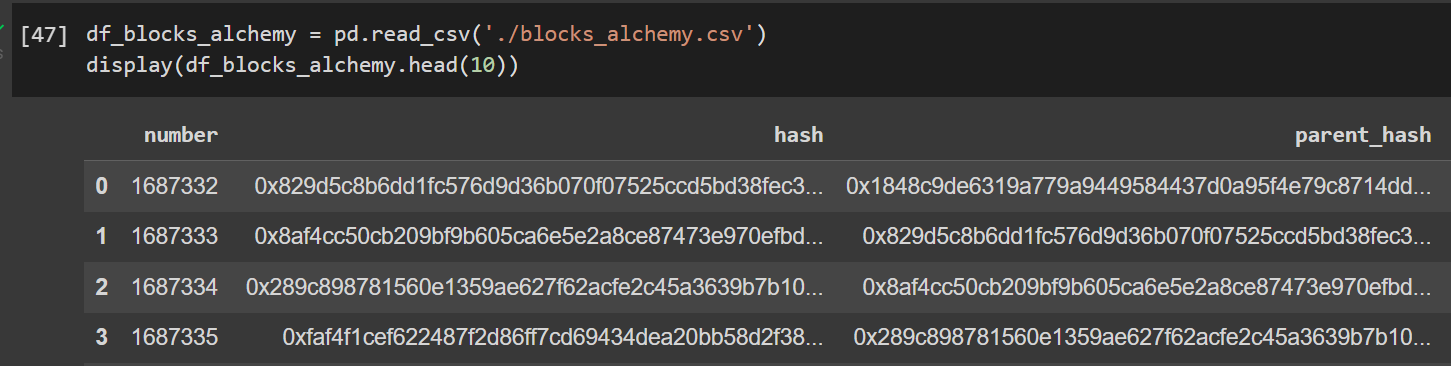

Quicknode:
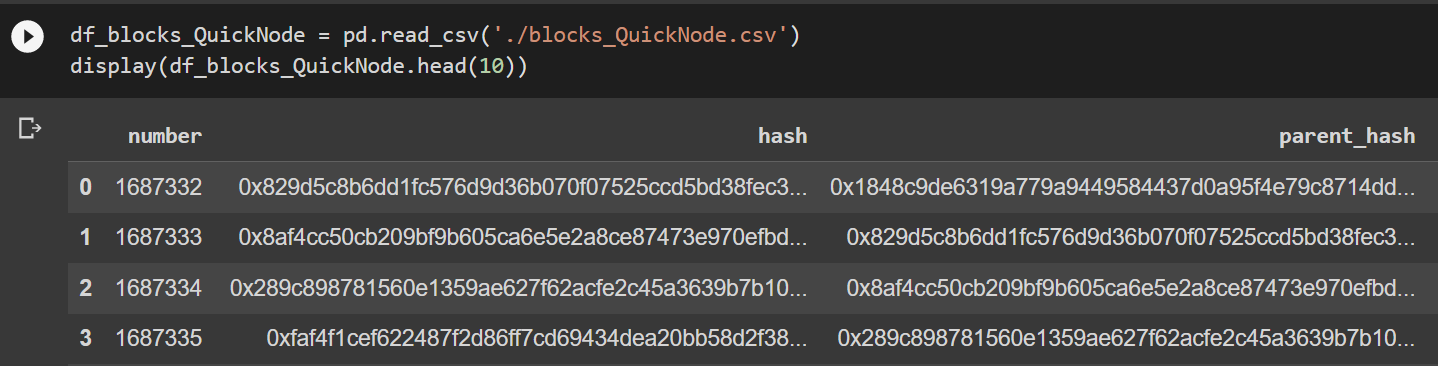


## Question 2

Please introduce the token that you queried in 100 words:


*   when the token first was issued?
*   what functions do the token support?
*.  what is the current market value of the token? 

Please provide references that could back-up your answer. 
Please insert Figures/Tables to better represent your idea. 


The token I chose was Ocean Token. The OCEAN utility token is used for community governance as well as to buy & sell data and publish data on Ocean Market. It is an ERC-20 token operating on the Ethereum blockchain. Ocean token facilitates data exchange by linking users who need data to those with the resources, and in return they are awarded OCEAN. It was first issued in 2019, and the current market value on November 20th 2022 is roughly $0.13 ([as shown below](https://oceanprotocol.com/token)).

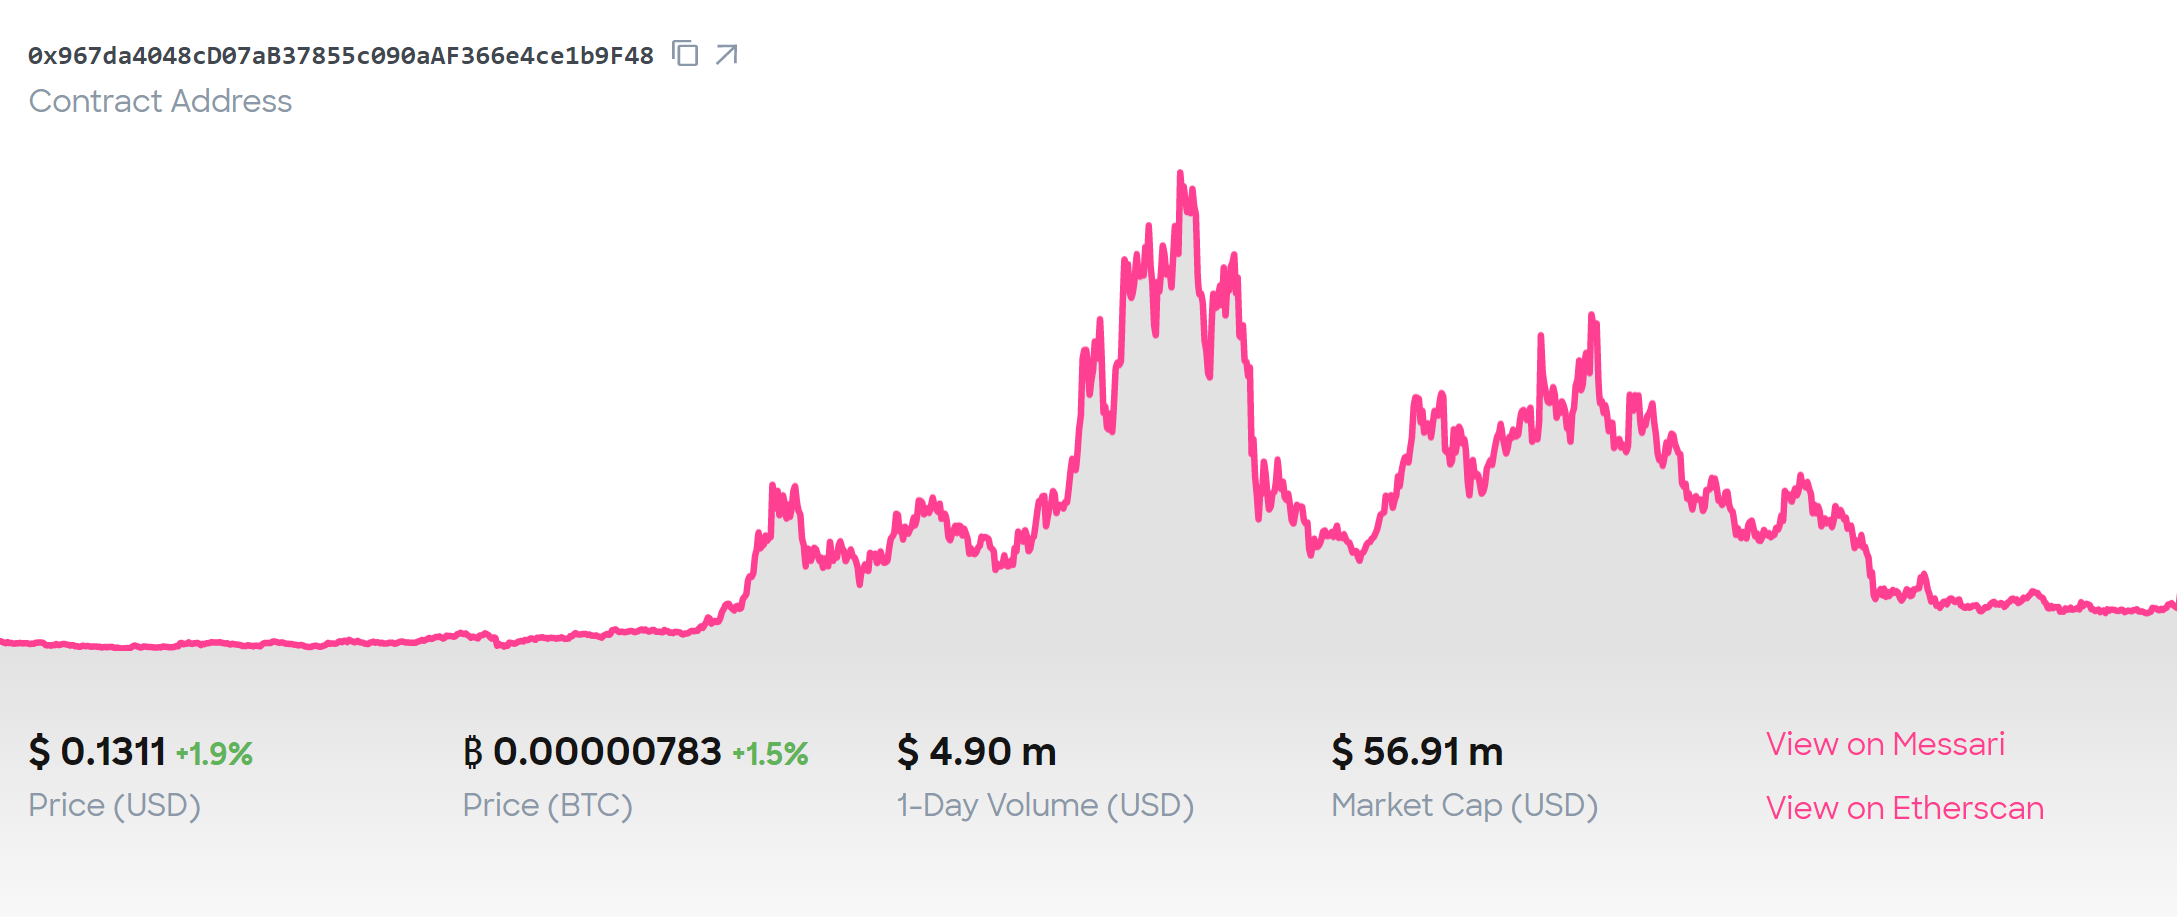
Sources:

https://www.kraken.com/en-gb/learn/what-is-ocean-protocol
https://blog.oceanprotocol.com/https-blog-oceanprotocol-com-ocean-tokenomics-ii-faf05854314b

### Question 3: 

What are the changes of Ethereum before and after the merge? Please identify at least three different changes to elaborate on. 

Please provide references that could back-up your answer. 

Please insert Figures/Tables to better represent your idea. 





Ethereum's merge brought upon a variety of changes. The most significant one was the shift from proof-of-work (PoW) blockchain to proof-of-stake (PoS) system.


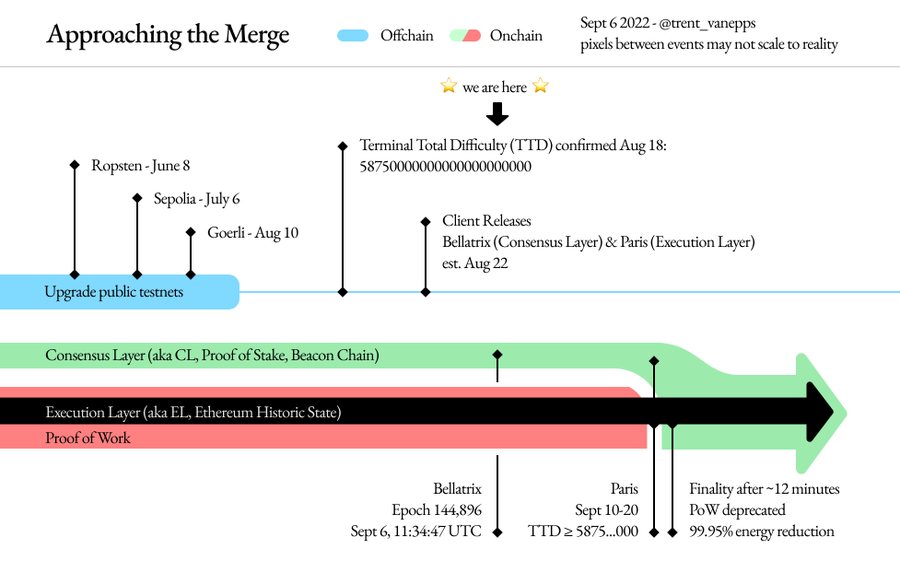
figure 1: roadmap of the merge (["Ethereum's Merge:PoW vs PoS" 2022](https://medium.com/geekculture/ethereums-merge-pow-vs-pos-3924140ed594))

PoW is a very energy-intensive competetive mining systme, and PoS is more enerrgy efficient, so this change will reduce energy usage on the network by 99.5% (["What is the Ethereum Merge"](https://www.kraken.com/learn/ethereum-merge-explained)). For example, 100,000 Visa transactions consume about 149 kWh, compared to 0.667 kWh for 100,000 transactions on the combined PoS Ethereum network (["Analyze the changes before and after the merger" 2022](https://coinyuppie.com/analyze-the-changes-before-and-after-the-merger-of-ethereum-from-the-five-dimensional-data/)).


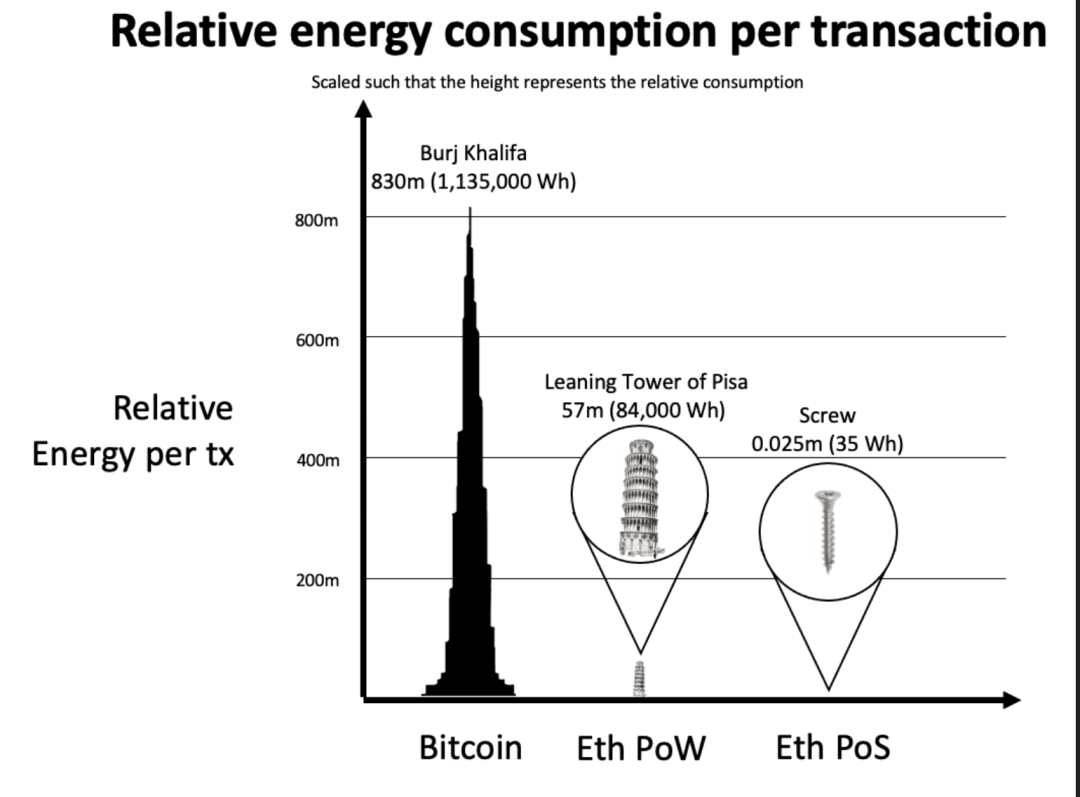
figure 2: energy consumption by transaction (["Analyze the changes before and after the merger" 2022](https://coinyuppie.com/analyze-the-changes-before-and-after-the-merger-of-ethereum-from-the-five-dimensional-data/))

There will also be higher security with the new system, and the attack cost of PoS is higher than PoW. In PoS network, there is a built-in slashing mechanism for some 51% of attacks (["Analyze the changes before and after the merger" 2022](https://coinyuppie.com/analyze-the-changes-before-and-after-the-merger-of-ethereum-from-the-five-dimensional-data/)).

# Part I: Install Required Dependancies 

In [ ]:
# install ethereum-etl and pandas
!python -m pip install ethereum-etl pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 336 kB 7.2 MB/s 
     |████████████████████████████████| 501 kB 44.3 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 44 kB 2.9 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 1.6 MB 40.2 MB/s 
     |████████████████████████████████| 82 kB 894 kB/s 
     |████████████████████████████████| 103 kB 67.2 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
     |████████████████████████████████| 1.1 MB 57.4 MB/s 
     |████████████████████████████████| 235 kB 67.9 MB/s 
     |████████████████████████████████| 2.3 MB 40.4 MB/s 
     |████████████████████████████████| 1.9 MB 41.0 MB/s 
  Created wheel for ethereum-etl: filename=ethereum_etl-2.1.1-py3-none-any.whl size=438798 sha256=0d99ac5d018e51fe210cad198cee2b26215aedc9ec7010452ca4eca824

# Part II: Mount Google Drive for Result Exports

In [ ]:
# mount google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# print the current directory
!pwd

/content


In [ ]:
#@title path
#create a project folder and identify the path
path = "/content/drive/MyDrive/EthereumETL" #@param {type:"string"}


In [ ]:
#go to your project folder 
%cd /content/drive/MyDrive/EthereumETL

/content/drive/MyDrive/EthereumETL


In [ ]:
# print the current directory again to make sure that you are in the project folder
!pwd

/content/drive/MyDrive/EthereumETL


# Part III: Query Data and Export CSV

## 0.Register Accounts on Remote Nodes Service and Get the URLs of the Nodes

### Remote node option 1: Infura

!!! Important Notes: Please replace https://mainnet.infura.io/v3/API_KEY with your own endpoints for all the codes below

In [ ]:
#@title Import using the Infura node
infura_end_points_URL = "https://mainnet.infura.io/v3/API_KEY" #@param {type:"string"}


### Remote node option 2: Alchemy 

In [ ]:
#@title import using Alchemy
alchemy_end_points_URL = "https://eth-mainnet.g.alchemy.com/v2/API_KEY" #@param {type:"string"}


### Remote node option 3: QuickNode

In [ ]:
#@title import using QuickNode
QuickNode_end_points_URL = "https://young-soft-arm.discover.quiknode.pro/API_KEY" #@param {type:"string"}




Data Range: We are going to query the block and transaction data for the ethereum blockchain before and after the merge (block number: 15537393 on September 15)

Reference; 
https://www.investopedia.com/ethereum-completes-the-merge-6666337



In [ ]:
#@title the merge
merge = 15537393 #@param {type:"number"}

In [ ]:
#@title data radius
radius = 5 #@param {type:"number"}


In [ ]:
### find the start and the end
start = merge-radius
end = merge+radius
print(start, end)

15537388 15537398


## 1. Query Block Data

### using the infura endpoint

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 1687332 --end-block 1687337 --blocks-output blocks.csv --provider-uri https://mainnet.infura.io/v3/API_KEY

2022-11-11 20:56:05,051 - ProgressLogger [INFO] - Started work. Items to process: 6.
2022-11-11 20:56:05,343 - ProgressLogger [INFO] - 6 items processed. Progress is 100%.
2022-11-11 20:56:05,343 - ProgressLogger [INFO] - Finished work. Total items processed: 6. Took 0:00:00.292269.
2022-11-11 20:56:05,344 - CompositeItemExporter [INFO] - block items exported: 6
2022-11-11 20:56:05,344 - CompositeItemExporter [INFO] - transaction items exported: 0


In [ ]:
# import libraries to print data frame
import pandas as pd

In [ ]:
# set to print the maximum numbers of rows
pd.set_option('display.max_rows', None)

In [ ]:
df_blocks = pd.read_csv('./blocks.csv')
display(df_blocks.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,1687332,0x829d5c8b6dd1fc576d9d36b070f07525ccd5bd38fec3...,0x1848c9de6319a779a9449584437d0a95f4e79c8714dd...,0x135a526fc45261f6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x9de549b359e0e9f9449add3733f1b186c912b6c200a6...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,47398507972239,26708409155057970484,541,0xd783010404844765746887676f312e342e32856c696e...,4712388,0,1465689239,0,NaN
1,1687333,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,0x829d5c8b6dd1fc576d9d36b070f07525ccd5bd38fec3...,0x6f44387cc93e160a,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000400000000000000000...,0x7927af136646c0e312ec33774a9c2d4b61a8ad307143...,0x64f771355c2d5c552ed12e802d3b5a508909dc541e00...,0xfc13e92ceabf5b2ca9bf3b485793e614db06654eb437...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,47421651791343,26708456576709761827,685,0xd783010404844765746887676f312e342e32856c696e...,4712388,25094,1465689244,1,NaN
2,1687334,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,0xe73672dcae448a8d,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000400000000000000000...,0x4e9e220f3a44b94e3b401834a2c840c171a0e8f7b807...,0x33e60d75ab2058c1e8bebd99d520c834c6985e95102d...,0x6ed20b2907641529bedd2b10274f4faf3984d08c857d...,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,47444806911140,26708504021516672967,792,0x657468706f6f6c2e6f7267202845553129,4712388,48426,1465689250,2,NaN
3,1687335,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,0x5ebf676009c818b6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0xc3ba7553cfd529d517ca891486ca0f8e1d82ec103fbb...,0xdee363cd834977741d09749ef2ae33f425496bae804b...,0x00d4c42b5af1ca4e31d88a48a9732a0b519eb421893d...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,47467973337148,26708551489490010115,658,0xd783010406844765746887676f312e362e31856c696e...,4712388,21000,1465689252,1,NaN
4,1687336,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,0x00e0080003e15381,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x37a21a70a13ec9273459c33b301b3859db39203b313f...,0x20a229e398bfedcf7e1154921901bc23aef80e78f588...,0x77e901caf894197a1a65d34b71a9c9acae8dbee0002b...,0xf8b483dba2c3b7176a3da549ad41a48bb3121069,47491151074888,26708598980641085003,660,0xd983010404844765746887676f312e342e328777696e...,4712388,21000,1465689256,1,NaN
5,1687337,0xec801729eac45b3bc0695a67ed7597cc7ef52cf7ea63...,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,0x2b070be8007633e2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x86b0b16949646eecbe271d06dfb987cd9d14b76a8b3c...,0xed790fb0cfda2c711cba1a1d2450d602e1193e642228...,0xa02f629ea61d83bc973483597993cb6e9a3216c89507...,0xf8b483dba2c3b7176a3da549ad41a48bb3121069,47514340129882,26708646494981214885,660,0xd983010404844765746887676f312e342e328777696e...,4712388,21000,1465689261,1,NaN


### query blockchain data using the alchemy endpoint


In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 1687332 --end-block 1687337 --blocks-output blocks_alchemy.csv --provider-uri https://eth-mainnet.g.alchemy.com/v2/API_KEY


2022-11-11 20:56:08,852 - ProgressLogger [INFO] - Started work. Items to process: 6.
2022-11-11 20:56:09,017 - ProgressLogger [INFO] - 6 items processed. Progress is 100%.
2022-11-11 20:56:09,018 - ProgressLogger [INFO] - Finished work. Total items processed: 6. Took 0:00:00.165411.
2022-11-11 20:56:09,018 - CompositeItemExporter [INFO] - block items exported: 6
2022-11-11 20:56:09,018 - CompositeItemExporter [INFO] - transaction items exported: 0


In [ ]:
df_blocks_alchemy = pd.read_csv('./blocks_alchemy.csv')
display(df_blocks_alchemy.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,1687332,0x829d5c8b6dd1fc576d9d36b070f07525ccd5bd38fec3...,0x1848c9de6319a779a9449584437d0a95f4e79c8714dd...,0x135a526fc45261f6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x9de549b359e0e9f9449add3733f1b186c912b6c200a6...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,47398507972239,26708409155057970484,541,0xd783010404844765746887676f312e342e32856c696e...,4712388,0,1465689239,0,NaN
1,1687333,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,0x829d5c8b6dd1fc576d9d36b070f07525ccd5bd38fec3...,0x6f44387cc93e160a,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000400000000000000000...,0x7927af136646c0e312ec33774a9c2d4b61a8ad307143...,0x64f771355c2d5c552ed12e802d3b5a508909dc541e00...,0xfc13e92ceabf5b2ca9bf3b485793e614db06654eb437...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,47421651791343,26708456576709761827,685,0xd783010404844765746887676f312e342e32856c696e...,4712388,25094,1465689244,1,NaN
2,1687334,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,0xe73672dcae448a8d,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000400000000000000000...,0x4e9e220f3a44b94e3b401834a2c840c171a0e8f7b807...,0x33e60d75ab2058c1e8bebd99d520c834c6985e95102d...,0x6ed20b2907641529bedd2b10274f4faf3984d08c857d...,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,47444806911140,26708504021516672967,792,0x657468706f6f6c2e6f7267202845553129,4712388,48426,1465689250,2,NaN
3,1687335,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,0x5ebf676009c818b6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0xc3ba7553cfd529d517ca891486ca0f8e1d82ec103fbb...,0xdee363cd834977741d09749ef2ae33f425496bae804b...,0x00d4c42b5af1ca4e31d88a48a9732a0b519eb421893d...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,47467973337148,26708551489490010115,658,0xd783010406844765746887676f312e362e31856c696e...,4712388,21000,1465689252,1,NaN
4,1687336,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,0x00e0080003e15381,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x37a21a70a13ec9273459c33b301b3859db39203b313f...,0x20a229e398bfedcf7e1154921901bc23aef80e78f588...,0x77e901caf894197a1a65d34b71a9c9acae8dbee0002b...,0xf8b483dba2c3b7176a3da549ad41a48bb3121069,47491151074888,26708598980641085003,660,0xd983010404844765746887676f312e342e328777696e...,4712388,21000,1465689256,1,NaN
5,1687337,0xec801729eac45b3bc0695a67ed7597cc7ef52cf7ea63...,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,0x2b070be8007633e2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x86b0b16949646eecbe271d06dfb987cd9d14b76a8b3c...,0xed790fb0cfda2c711cba1a1d2450d602e1193e642228...,0xa02f629ea61d83bc973483597993cb6e9a3216c89507...,0xf8b483dba2c3b7176a3da549ad41a48bb3121069,47514340129882,26708646494981214885,660,0xd983010404844765746887676f312e342e328777696e...,4712388,21000,1465689261,1,NaN


### query the data using the QuickNode endpoint

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 1687332 --end-block 1687337 --blocks-output blocks_QuickNode.csv --provider-uri https://young-soft-arm.discover.quiknode.pro/API_KEY/

2022-11-11 20:56:11,181 - ProgressLogger [INFO] - Started work. Items to process: 6.
2022-11-11 20:56:11,285 - ProgressLogger [INFO] - 6 items processed. Progress is 100%.
2022-11-11 20:56:11,285 - ProgressLogger [INFO] - Finished work. Total items processed: 6. Took 0:00:00.104571.
2022-11-11 20:56:11,285 - CompositeItemExporter [INFO] - block items exported: 6
2022-11-11 20:56:11,286 - CompositeItemExporter [INFO] - transaction items exported: 0


In [ ]:
df_blocks_QuickNode = pd.read_csv('./blocks_QuickNode.csv')
display(df_blocks_QuickNode.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,1687332,0x829d5c8b6dd1fc576d9d36b070f07525ccd5bd38fec3...,0x1848c9de6319a779a9449584437d0a95f4e79c8714dd...,0x135a526fc45261f6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x9de549b359e0e9f9449add3733f1b186c912b6c200a6...,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,47398507972239,26708409155057970484,541,0xd783010404844765746887676f312e342e32856c696e...,4712388,0,1465689239,0,NaN
1,1687333,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,0x829d5c8b6dd1fc576d9d36b070f07525ccd5bd38fec3...,0x6f44387cc93e160a,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000400000000000000000...,0x7927af136646c0e312ec33774a9c2d4b61a8ad307143...,0x64f771355c2d5c552ed12e802d3b5a508909dc541e00...,0xfc13e92ceabf5b2ca9bf3b485793e614db06654eb437...,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,47421651791343,26708456576709761827,685,0xd783010404844765746887676f312e342e32856c696e...,4712388,25094,1465689244,1,NaN
2,1687334,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,0xe73672dcae448a8d,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000400000000000000000...,0x4e9e220f3a44b94e3b401834a2c840c171a0e8f7b807...,0x33e60d75ab2058c1e8bebd99d520c834c6985e95102d...,0x6ed20b2907641529bedd2b10274f4faf3984d08c857d...,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,47444806911140,26708504021516672967,792,0x657468706f6f6c2e6f7267202845553129,4712388,48426,1465689250,2,NaN
3,1687335,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,0x5ebf676009c818b6,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0xc3ba7553cfd529d517ca891486ca0f8e1d82ec103fbb...,0xdee363cd834977741d09749ef2ae33f425496bae804b...,0x00d4c42b5af1ca4e31d88a48a9732a0b519eb421893d...,0x2a65aca4d5fc5b5c859090a6c34d164135398226,47467973337148,26708551489490010115,658,0xd783010406844765746887676f312e362e31856c696e...,4712388,21000,1465689252,1,NaN
4,1687336,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,0x00e0080003e15381,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x37a21a70a13ec9273459c33b301b3859db39203b313f...,0x20a229e398bfedcf7e1154921901bc23aef80e78f588...,0x77e901caf894197a1a65d34b71a9c9acae8dbee0002b...,0xf8b483dba2c3b7176a3da549ad41a48bb3121069,47491151074888,26708598980641085003,660,0xd983010404844765746887676f312e342e328777696e...,4712388,21000,1465689256,1,NaN
5,1687337,0xec801729eac45b3bc0695a67ed7597cc7ef52cf7ea63...,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,0x2b070be8007633e2,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000000000000000000000000000000000000000000...,0x86b0b16949646eecbe271d06dfb987cd9d14b76a8b3c...,0xed790fb0cfda2c711cba1a1d2450d602e1193e642228...,0xa02f629ea61d83bc973483597993cb6e9a3216c89507...,0xf8b483dba2c3b7176a3da549ad41a48bb3121069,47514340129882,26708646494981214885,660,0xd983010404844765746887676f312e342e328777696e...,4712388,21000,1465689261,1,NaN


## 2. Query Transaction Data

In [ ]:
!ethereumetl export_blocks_and_transactions --start-block 1687332  --end-block 1687337 --transactions-output transactions.csv --provider-uri https://mainnet.infura.io/v3/API_KEY

2022-11-11 20:57:17,650 - ProgressLogger [INFO] - Started work. Items to process: 6.
2022-11-11 20:57:17,937 - ProgressLogger [INFO] - 6 items processed. Progress is 100%.
2022-11-11 20:57:17,937 - ProgressLogger [INFO] - Finished work. Total items processed: 6. Took 0:00:00.287508.
2022-11-11 20:57:17,938 - CompositeItemExporter [INFO] - block items exported: 0
2022-11-11 20:57:17,938 - CompositeItemExporter [INFO] - transaction items exported: 6


In [ ]:
df_transactions = pd.read_csv('./transactions.csv')
display(df_transactions.head())

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,0xa6d87f9449121032f0bee968af30f45446c45ea4a49a...,6700,0x8af4cc50cb209bf9b605ca6e5e2a8ce87473e970efbd...,1687333,0,0xed059bc543141c8c93031d545079b3da0233b27f,0xec9f6c9634165f91e22e58b90e3ede393d959e47,0,250000,20000000000,0x7edae70f000000000000000000000000d2c07ba76cc3...,1465689244,NaN,NaN,0
1,0xc923acababe6097aad9105f3cecdd29f4f5a0da1c53b...,796026,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,1687334,0,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0x42877aeb7c16cacddbeb082b67f37bca5548dbf5,1677719920000000000,90000,20000000000,0x,1465689250,NaN,NaN,0
2,0x6cc20710d863c6cd47de2c722828b45551ce54b814e4...,6701,0x289c898781560e1359ae627f62acfe2c45a3639b7b10...,1687334,1,0xed059bc543141c8c93031d545079b3da0233b27f,0xec9f6c9634165f91e22e58b90e3ede393d959e47,0,250000,20000000000,0x7edae70f000000000000000000000000d2c07ba76cc3...,1465689250,NaN,NaN,0
3,0x8a880436b57527f20876bb8b8d035cad5a0bf5522c7b...,796027,0xfaf4f1cef622487f2d86ff7cd69434dea20bb58d2f38...,1687335,0,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0xa5fb3e4399e8f18643f969d0ce65cc352fc252c6,1551543880000000000,90000,20000000000,0x,1465689252,NaN,NaN,0
4,0x5a8ee79547d3d96a2b668e61ad2061059a978e4f8d1a...,796028,0xa3c4978a62176a60c20b35e1e38bcb069bbbeaf35c17...,1687336,0,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0x17a6309f9e66138b7dc5a923eb3e6d6db0f2fd04,1231513140000000000,90000,20000000000,0x,1465689256,NaN,NaN,0


## 3. Query Token Data

### 3.1 Query All Token Transfers

In [ ]:
!ethereumetl export_token_transfers --start-block 1687332 --end-block 1687337 --provider-uri https://mainnet.infura.io/v3/API_KEY --output token_transfers.csv

2022-11-11 20:57:26,173 - ProgressLogger [INFO] - Started work. Items to process: 6.
2022-11-11 20:57:26,606 - ProgressLogger [INFO] - 6 items processed. Progress is 100%.
2022-11-11 20:57:26,606 - ProgressLogger [INFO] - Finished work. Total items processed: 6. Took 0:00:00.433382.
2022-11-11 20:57:26,606 - CompositeItemExporter [INFO] - token_transfer items exported: 1


In [ ]:
df_token_transfers = pd.read_csv('./token_transfers.csv')
display(df_token_transfers.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0xe0b7927c4af23765cb51314a0e0521a9645f0e2a,0xd2c07ba76cc361112e2123aba619339d494fcb8f,0xec9f6c9634165f91e22e58b90e3ede393d959e47,107000000000,0xa6d87f9449121032f0bee968af30f45446c45ea4a49a...,0,1687333


In [ ]:
df = df_token_transfers[df_token_transfers.token_address=="0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a"]
df.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number


### 3.1 Query a specific token transfers

*references*:

* Commond Documentations: https://ethereum-etl.readthedocs.io/en/latest/commands/
* Token Address: https://github.com/blockchain-etl/ethereum-etl-airflow/blob/master/dags/resources/stages/seed/data/token_amendments.csv
* More detailed: https://github.com/blockchain-etl/ethereum-etl-airflow
* Proof-of-Reserve: https://blog.chain.link/stablecoins-and-proof-of-reserve/





In [ ]:
#@title Token Name
Token_Name = "Ocean Token" #@param {type:"string"}



In [ ]:
#@title Token Symbol
Token_Symbol = "SLP" #@param {type:"string"}


In [ ]:
#@title Token Address
token_address = "0x967da4048cd07ab37855c090aaf366e4ce1b9f48" #@param {type:"string"}


In [ ]:
!ethereumetl export_token_transfers --start-block 9833265 --end-block 9833269 --provider-uri https://mainnet.infura.io/v3/2550b950b1634e9e8dad685bd4e415ef --output token_transfers_USDP.csv --tokens 0x8E870D67F660D95d5be530380D0eC0bd388289E1

2022-11-11 20:46:34,303 - ProgressLogger [INFO] - Started work. Items to process: 5.
2022-11-11 20:46:34,741 - ProgressLogger [INFO] - 5 items processed. Progress is 100%.
2022-11-11 20:46:34,741 - ProgressLogger [INFO] - Finished work. Total items processed: 5. Took 0:00:00.437989.
2022-11-11 20:46:34,742 - CompositeItemExporter [INFO] - token_transfer items exported: 2


In [ ]:
df_token_transfers_USDP = pd.read_csv('./token_transfers_USDP.csv')
display(df_token_transfers_USDP.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0x8e870d67f660d95d5be530380d0ec0bd388289e1,0x54acce41e390cc3926a25f8b248c99429c8dbc58,0x4e1c2d0a558cca9fd21d6fcd8a9974ff1011c5e2,10000000000000000,0xb911820ed2505903bc80a0264393a93435df2e1b6f1a...,19,9833265
1,0x8e870d67f660d95d5be530380d0ec0bd388289e1,0x10eabc764c727dfedf94ed460f057a5490976c78,0x2b4b7ece5c73a4d1266254b2053261286db5f5ba,3000000000000000000,0xd6e65b9d8cb57263c46e097b8ee6fa2d84409371ffd6...,143,9833267
